<a href="https://colab.research.google.com/github/Wikanes-k/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

#ข้อ 1.ข้อมูลโจทย์ อยู่ใน ตัวแปร Data

In [85]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [86]:
Name = 'วิฆเนศ เกียรติเกษมสุข'
ID = '6230210556'

In [87]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [88]:
Data = DataGenerator(Name,ID)

021:22:18


In [89]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,3.194903,-2.484340,9.046534,5.526724,-7.200411,-5.422545,6.863710,-2.819618,-1.272393,-7.801303,3.958371,8.572270,8.361012,-4.429934,4.652552,-7.054646,-3.261196,-1.723801,2.323923,-0.561950,-0.579829,0.106464,-4.968681,2.532319
1,-0.213970,3.045143,-4.711877,1.873009,-0.599405,-5.617942,8.652119,-2.984660,-7.625184,-8.832367,-0.548511,-7.382334,4.673768,-9.341331,-7.842799,-8.708402,7.103475,4.578204,8.623073,7.470627,-6.989783,0.296539,6.090287,3.482695
2,-1.979782,-4.234113,6.069967,-3.083000,-7.008880,-3.086111,1.928047,-6.068686,-4.005132,6.158407,-0.383451,5.053533,9.074643,-5.802774,1.036415,-7.645215,9.827508,6.990707,3.178064,-7.804276,10.920628,-9.738056,-8.468227,-46.690281
3,0.891762,-5.713522,-2.516742,-6.357597,-8.092526,6.917633,5.331113,-9.361055,-3.762856,-3.937647,5.313438,0.836192,-1.030030,-4.608901,0.232444,8.016438,9.761336,-8.898094,1.344340,-10.271389,6.805579,2.809819,-11.427045,16.049094
4,-3.019054,2.111087,-0.041213,4.371200,-4.707153,-4.773634,7.302765,8.429015,1.500328,9.601859,6.408265,8.036825,1.085440,-7.069588,1.090082,10.219567,-2.069758,3.511844,-8.153129,-3.323127,-6.466091,7.969829,4.222173,41.849147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.551409,-2.593693,-9.460313,7.666266,8.326343,8.742272,9.192368,-10.023568,8.308823,-7.588181,10.580945,5.089918,7.325876,6.778694,8.851949,3.778175,6.929695,-8.678640,3.897597,6.768477,7.666765,-10.095008,-5.187386,-48.475041
9996,-1.892205,-3.202756,5.180795,-0.702603,-5.345112,-4.413034,3.348990,-5.589029,-2.968417,7.388957,0.499593,3.935998,9.548590,-5.225462,0.176967,-6.254073,9.367047,6.924998,2.795622,-7.109549,9.215384,-8.584671,-6.405511,-40.923353
9997,2.281352,-4.642635,-2.566606,-3.402290,-6.133717,5.704547,5.233088,-9.440874,-3.886720,-3.985638,4.023319,-1.960977,-0.468020,-4.943990,1.311771,7.310821,9.513713,-8.942738,1.474599,-9.703660,6.691818,2.518505,-9.285271,14.592527
9998,0.046269,-3.550455,-3.713558,-5.652540,-9.502716,5.354921,3.992697,-10.604678,-5.367437,-5.581199,5.106539,-1.281593,-2.528070,-6.575592,1.445353,7.182034,9.015343,-8.080399,0.323079,-8.678822,6.641757,3.538480,-7.100910,19.692400


####หลังจากได้ตารางDATAแล้ว จะต้องตัดข้อมูลที่มีค่า correlation ที่ซ้ำกันออก

In [167]:
Data.shape   #ตรวจสอบขนาดของข้อมูล / 10000แถว 24คอลัมน์

(10000, 24)

In [105]:
corr = np.corrcoef(Data.to_numpy().T)  #คำสั่งการตัดข้อมูลที่มีค่า correlation ที่ซ้ำกันออกไป

In [168]:
corr.shape  #ดูขนาดของ corr / 24แถว 24คอลัมน์

(24, 24)

In [107]:
corr

array([[ 1.        ,  0.18335177,  0.2240476 ,  0.15627875, -0.12517472,
         0.12645987,  0.10648143, -0.13640438,  0.00293363, -0.32972006,
        -0.12623187,  0.01111455,  0.15857701,  0.20240345,  0.07918446,
        -0.26915762, -0.02372508,  0.15115922, -0.01005665, -0.03825634,
         0.09098866, -0.05086225,  0.18335177, -0.05086225],
       [ 0.18335177,  1.        ,  0.32704597,  0.09108711,  0.00999514,
        -0.07497375, -0.36645677,  0.39767903, -0.04786276, -0.03057504,
        -0.29818791, -0.0849468 , -0.01551588,  0.02118802,  0.24365076,
        -0.16181281, -0.12873383,  0.15726713, -0.20832192, -0.03943818,
         0.04668214,  0.20729742,  1.        ,  0.20729742],
       [ 0.2240476 ,  0.32704597,  1.        , -0.00241751, -0.41348103,
        -0.52329981, -0.30193309,  0.12671032, -0.29006621, -0.04247862,
        -0.12885377,  0.18390584, -0.04204803, -0.12525977,  0.57040577,
        -0.19802438,  0.04813889,  0.43379205,  0.32877498, -0.35301909,
  

####ทำการวนลูปหาค่าสัมประสิทธิ์ความสัมพันธ์ (Correlation)ที่ซ้ำกันเพื่อนำข้อมูลนั้นออกไป

In [110]:
for i in range(corr.shape[0]): 
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

จากการวนลูป พบว่า correlation ไม่มีตัวซ้ำกัน จึงไม่จำเป็นต้องตัดข้อมูลใดออก ดังนั้นจึงนำ Data ไปใช้ได้เลย

In [108]:
Data.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.000000,0.183352,0.224048,0.156279,-0.125175,0.126460,0.106481,-0.136404,0.002934,-0.329720,-0.126232,0.011115,0.158577,0.202403,0.079184,-0.269158,-0.023725,0.151159,-0.010057,-0.038256,0.090989,-0.050862,0.183352,-0.050862
1,0.183352,1.000000,0.327046,0.091087,0.009995,-0.074974,-0.366457,0.397679,-0.047863,-0.030575,-0.298188,-0.084947,-0.015516,0.021188,0.243651,-0.161813,-0.128734,0.157267,-0.208322,-0.039438,0.046682,0.207297,1.000000,0.207297
2,0.224048,0.327046,1.000000,-0.002418,-0.413481,-0.523300,-0.301933,0.126710,-0.290066,-0.042479,-0.128854,0.183906,-0.042048,-0.125260,0.570406,-0.198024,0.048139,0.433792,0.328775,-0.353019,0.246149,-0.042018,0.327046,-0.042018
3,0.156279,0.091087,-0.002418,1.000000,0.328546,0.154176,0.287895,-0.043672,0.305621,-0.099281,0.383547,0.121038,0.304874,0.196034,0.369922,-0.212753,0.001474,-0.007655,-0.089881,0.429759,0.203342,-0.241983,0.091087,-0.241983
4,-0.125175,0.009995,-0.413481,0.328546,1.000000,0.555574,-0.276977,0.154420,0.308337,0.340121,-0.127235,-0.257330,-0.206898,0.427526,0.013010,-0.090083,-0.103402,-0.064789,-0.033324,0.267213,0.024319,-0.187664,0.009995,-0.187664
5,0.126460,-0.074974,-0.523300,0.154176,0.555574,1.000000,0.072070,-0.058553,0.230322,0.080797,-0.074938,-0.278028,-0.173770,0.447983,-0.032369,-0.024528,0.299582,-0.272880,-0.076667,0.018430,0.127168,-0.350866,-0.074974,-0.350866
6,0.106481,-0.366457,-0.301933,0.287895,-0.276977,0.072070,1.000000,-0.306412,0.001969,-0.173471,0.313627,0.186397,0.398228,-0.120296,-0.249926,0.156920,0.343179,0.006158,-0.005425,0.331384,0.187162,-0.068948,-0.366457,-0.068948
7,-0.136404,0.397679,0.126710,-0.043672,0.154420,-0.058553,-0.306412,1.000000,-0.389083,0.388824,-0.401645,0.171910,-0.132038,-0.422448,0.112313,0.001908,-0.062718,0.280184,-0.017874,0.221653,-0.234625,0.235872,0.397679,0.235872
8,0.002934,-0.047863,-0.290066,0.305621,0.308337,0.230322,0.001969,-0.389083,1.000000,0.023075,0.345766,0.132079,-0.226277,0.630098,0.062574,0.206041,-0.314659,-0.161413,-0.412751,-0.144367,-0.065240,-0.064924,-0.047863,-0.064924
9,-0.329720,-0.030575,-0.042479,-0.099281,0.340121,0.080797,-0.173471,0.388824,0.023075,1.000000,-0.221861,0.161810,-0.320569,-0.104401,-0.019300,0.161450,-0.126444,0.203944,-0.327098,-0.270769,0.121198,0.187624,-0.030575,0.187624


#ข้อ 2. ทำการ clustering data แล้วทำ visualize ให้ข้อมูลออกมาในรูปแบบ 2 มิติ

####import

In [169]:
from sklearn.cluster import KMeans  #import KMeanเข้ามา

####define

In [119]:
kmeans = KMeans(n_clusters=4, random_state=2021) #เลือกค่าkที่ต้องการ

####fit-transform

In [120]:
kmeans.fit(Data) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

####แสดงจุด cluster centers ที่คำนวณได้

In [121]:
kmeans.cluster_centers_

array([[ 2.89079607e+00,  2.64786243e+00,  1.15367689e+00,
         3.55993770e+00,  2.27067031e+00,  1.13737727e+00,
         1.52054554e+00,  1.56825332e-01, -2.41710483e+00,
        -1.85656305e+00, -2.61458727e+00, -1.29383220e+00,
         2.25608422e+00, -4.17628120e-01,  7.77322865e-01,
        -5.16423168e+00,  3.35561913e+00,  3.24839993e+00,
         1.56123531e-01,  7.69952543e-01,  3.74883751e-01,
         2.04577883e-02,  5.29572486e+00,  2.10228894e+00],
       [-1.03727547e+00, -4.21976100e+00, -1.30921058e+00,
         2.31064469e+00,  1.04243143e+00,  2.90189448e+00,
         5.88442967e+00, -6.86494396e+00,  1.40792766e+00,
        -7.72495655e-01,  5.17799559e+00,  4.98967220e+00,
         7.90521260e+00,  2.53607703e-01,  4.39625689e+00,
        -1.27786554e+00,  8.67118107e+00, -1.59234223e+00,
         3.28809073e+00,  5.06375643e-01,  8.61877454e+00,
        -9.16896969e+00, -8.43952199e+00, -4.38448484e+01],
       [ 4.69615171e+00,  6.83628145e+00,  1.79697928e

####ทำการทดสอบการจัดกลุ่มของ Data

In [122]:
B = kmeans.predict(Data)  #เพื่อจักกลุ่มของข้อมูล
B

array([0, 0, 1, ..., 3, 3, 3], dtype=int32)

####ทำ PCA เพื่อลด Dimention

In [131]:
pca = PCA(n_components=4)  #กำหนด Dimension = 4

In [132]:
new_pca = pca.fit_transform(Data)

In [133]:
import matplotlib

In [134]:
matplotlib.rcParams['figure.figsize']=[10,10]  #คำสั่งกำหนดขนาดของกราฟ

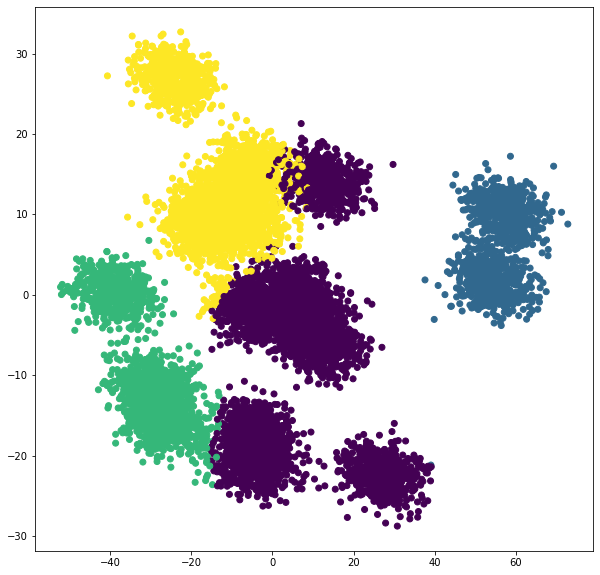

In [140]:
kmeans = KMeans(n_clusters=4,random_state=2021)
kmeans.fit(Data)
B = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1], c=H)

จากกราฟก็จะเห็นว่ายังมีการซ้อนทับกันของข้อมูลอยู่

####หาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่ม หรือทำการหาค่า k ที่เหมาะสมของ data ด้วยวิธี The Elbow Method

####ทำการหาค่า SSE (Sum of Squared error) ของข้อมูล

In [137]:
kmeans.inertia_  #หาSum of Squared error

7237582.683149591

In [142]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:  #กำหนด k=1-8
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [143]:
SSE #แสดงผลออกมา

[14613739.592412937,
 10228595.5539893,
 8442941.851562608,
 7237582.683149591,
 6364528.3036553655,
 5676679.0923629245,
 5170247.626188127,
 4512254.221309073]

####จากนั้นทำการนำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม

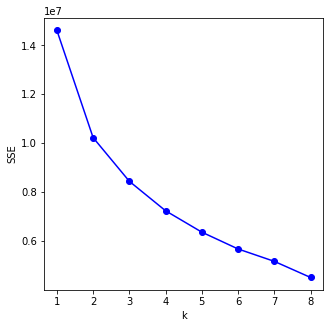

In [144]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟ จะเห็นว่าจุด 1-2 มีระยะห่างอีกแบบ แต่ตั้งแต่จุด2เป็นต้นไประยะห่างระหว่างจุดมีค่าใกล้เคียงกัน ดังนั้น ค่า K ที่เหมาะสม คือ 2 กลุ่ม

####ทำการหาค่า k เพื่อดูว่ามี2กลุ่มจริง?

In [145]:
from sklearn import metrics

In [146]:
SilB = list()
for k in [2,3,4,5,6,7,8]:  #กำหนด k=2-8
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilB.append(score)

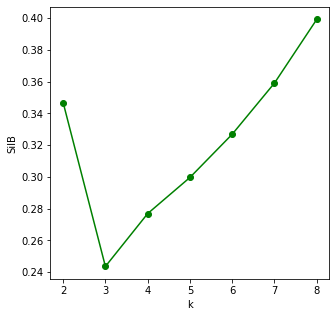

In [148]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([2,3,4,5,6,7,8],SilB,'o-g')
plt.xlabel('k')
plt.ylabel('SilB');

จากกราฟจะบอกได้ว่า k มีทั้งหมด 2 กลุ่ม ดูค่าได้โดยมีจุดที่มีระยะห่างแตกต่างกันใน 2 ช่วงที่ k เท่ากับ 2-3 และ 3-8 แสดงว่ามี 2 ช่วงจริง

####ทำการนำค่า ที่ได้นั้นมาเเบ่งกลุ่ม

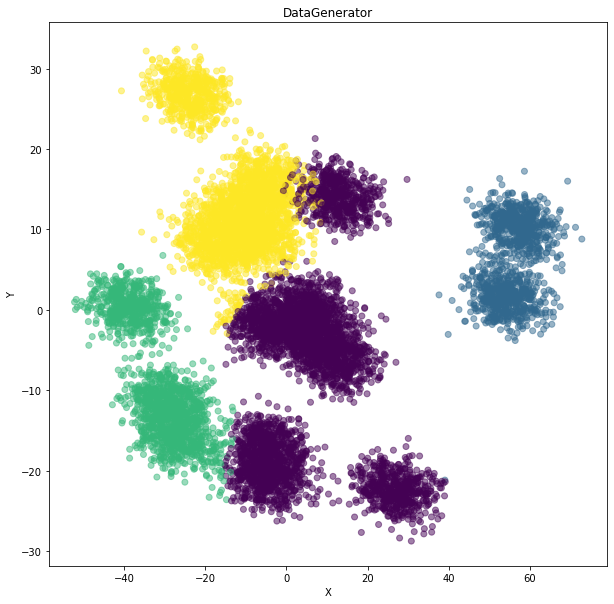

In [152]:
matplotlib.rcParams['figure.figsize']=[10,10]
kmeans = KMeans(n_clusters = 2,random_state=2021)
kmeans.fit(Data)
B = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=H,alpha=0.5)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากกราฟ จะได้ k เท่ากับ 4 กลุ่ม และมีข้อมูลบางจำนวนที่ทับซ้อนกัน

#ข้อ 3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

####Import

In [154]:
from sklearn.manifold import MDS

####Define

In [155]:
mds = MDS(n_components=2)

fit transform

In [156]:
new_mds = mds.fit_transform(Data)

####ทำการจัดกลุ่มจากการวัดระยะห่างในการจัดกลุ่ม ระหว่างจุดข้อมูล

In [162]:
kmeans_2 = KMeans(n_clusters=4,random_state=2021)
kmeans_2.fit(Data)
B = kmeans_2.predict(Data)

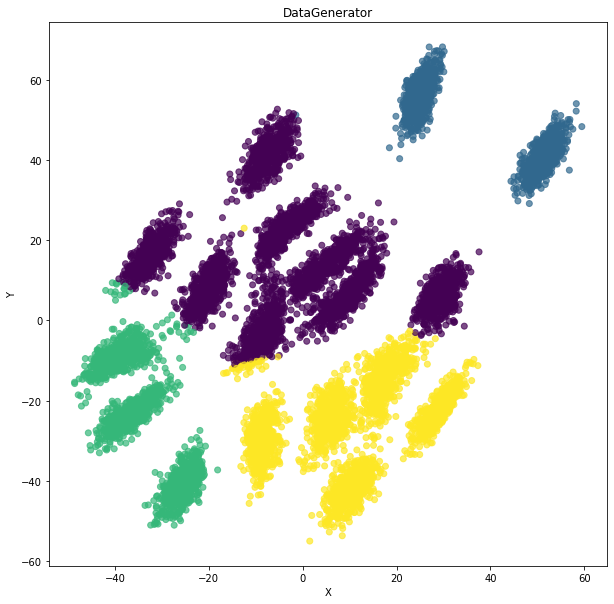

In [163]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=B,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

กราฟที่ได้จากการลด Dimension จะเห็นว่ายังมีการซ้อนทับกันของข้อมูลอยู่ในบ้างส่วน เพราะว่าข้อมูลนั้นมีจำนวนมากทับให้ยังซ้อนทับกันอยู่

#ข้อ 4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

####กราฟที่ 1 กราฟ PCA

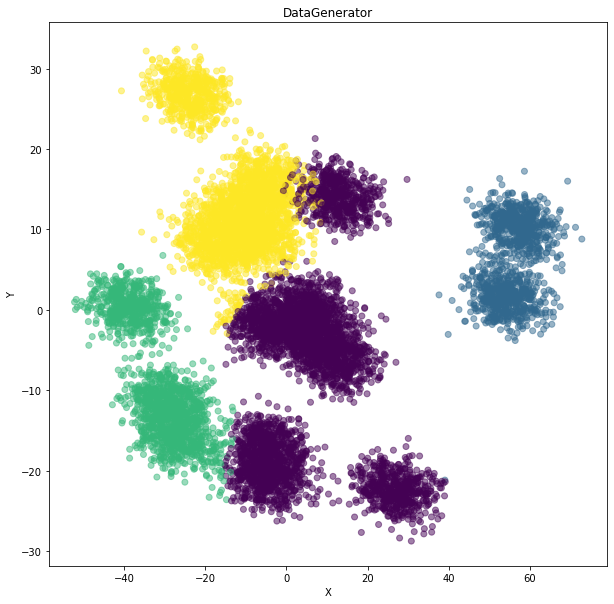

In [164]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=B,alpha=0.5)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

####กราฟที่ 2 กราฟ MDS

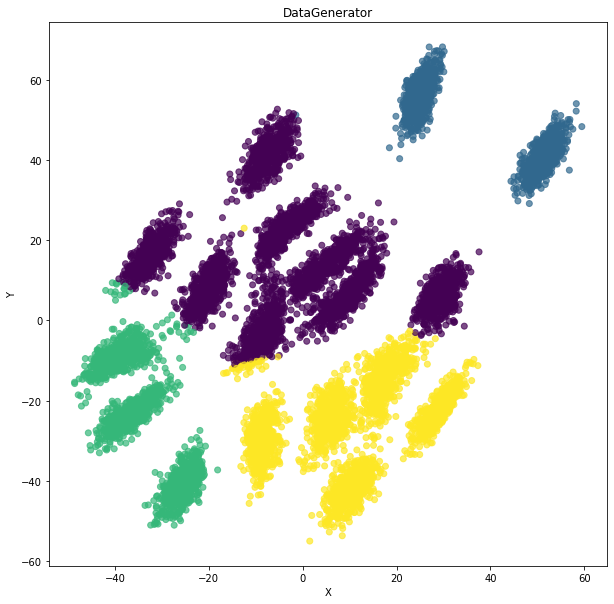

In [166]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=B,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากการเปรียบเทียบกราฟที่ 1 กราฟ PCA และ กราฟที่ 2 MDS จะเห็นว่าข้อมูลมีความแตกต่างกันส่วนกราฟที่ 1 ข้อมูลส่วนมากไม่มีการกระจายของข้อมูลและมีการซ้อนทับกันของข้อมูล แต่กราฟที่ 2 ข้อมูลจะมีการกระจายและมีการซ้อนทับกันที่น้อยลง